<a href="https://colab.research.google.com/github/msundaram03/Hacktrix_JimJamCoders/blob/main/Hacktrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
!pip install -q -U keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.7 MB/s eta 0:00:00


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ruchi798/housing-prices-in-metropolitan-areas-of-india

  0% 0.00/269k [00:00<?, ?B/s]
100% 269k/269k [00:00<00:00, 108MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import seaborn as sns
%matplotlib inline

from datetime import datetime
from dateutil import relativedelta

In [ ]:
zp = zipfile.ZipFile('/content/housing-prices-in-metropolitan-areas-of-india.zip')

In [ ]:
df = pd.read_csv(zp.open('Chennai.csv'))

In [ ]:
df.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                5014 non-null   int64 
 1   Area                 5014 non-null   int64 
 2   Location             5014 non-null   object
 3   No. of Bedrooms      5014 non-null   int64 
 4   Resale               5014 non-null   int64 
 5   MaintenanceStaff     5014 non-null   int64 
 6   Gymnasium            5014 non-null   int64 
 7   SwimmingPool         5014 non-null   int64 
 8   LandscapedGardens    5014 non-null   int64 
 9   JoggingTrack         5014 non-null   int64 
 10  RainWaterHarvesting  5014 non-null   int64 
 11  IndoorGames          5014 non-null   int64 
 12  ShoppingMall         5014 non-null   int64 
 13  Intercom             5014 non-null   int64 
 14  SportsFacility       5014 non-null   int64 
 15  ATM                  5014 non-null   int64 
 16  ClubHo

In [ ]:
df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [ ]:
#Getting the unique values
unique_values = df['Location'].unique()

print(unique_values)

['Perungalathur' 'Madhavaram' 'Karapakkam' 'Thiruvidandhai'
 'Iyappanthangal' 'Mevalurkuppam' 'Kolapakkam' 'Kundrathur' 'Pammal'
 'Puzhal' 'Selaiyur' 'Thoraipakkam OMR' 'Anna Nagar' 'Mogappair'
 'Sholinganallur' 'Medavakkam' 'Avadi' 'Tiruvottiyur' 'Manapakkam'
 'Madipakkam' 'Thiruvanmiyur' 'Ramapuram' 'Saidapet' 'Poonamallee'
 'Pallavaram' 'Maraimalai Nagar' 'Madambakkam' 'Perungudi' 'Villivakkam'
 'Adyar' 'Navallur' 'Moolacheri' 'Chromepet' 'Nandambakkam' 'Kelambakkam'
 'Vadapalani' 'Kumananchavadi' 'Porur' 'Periyapanicheri'
 'Manikandan Nagar' 'Kodambakkam' 'Velachery' 'East Tambaram'
 'Gopalapuram' 'Sunnambu Kolathur S Kolathur' 'Perumbakkam' 'Cholambedu'
 'Urapakkam' 'Raja Annamalai Puram' 'Besant Nagar' 'Peerakankaranai'
 'Nanmangalam' 'Jamalia' 'Guduvancheri' 'Sembakkam' 'Adambakkam'
 'Nungambakkam' 'T Nagar' 'K K Nagar' 'Ambattur' 'Valasaravakkam'
 'Kanathur Reddikuppam' 'Mugalivakkam' 'Purasaiwakkam' 'Maduravoyal'
 'Gowrivakkam' 'Mudichur' 'West Tambaram' 'Alwarpet' 'Annanagar 

---


# **EDA**


---

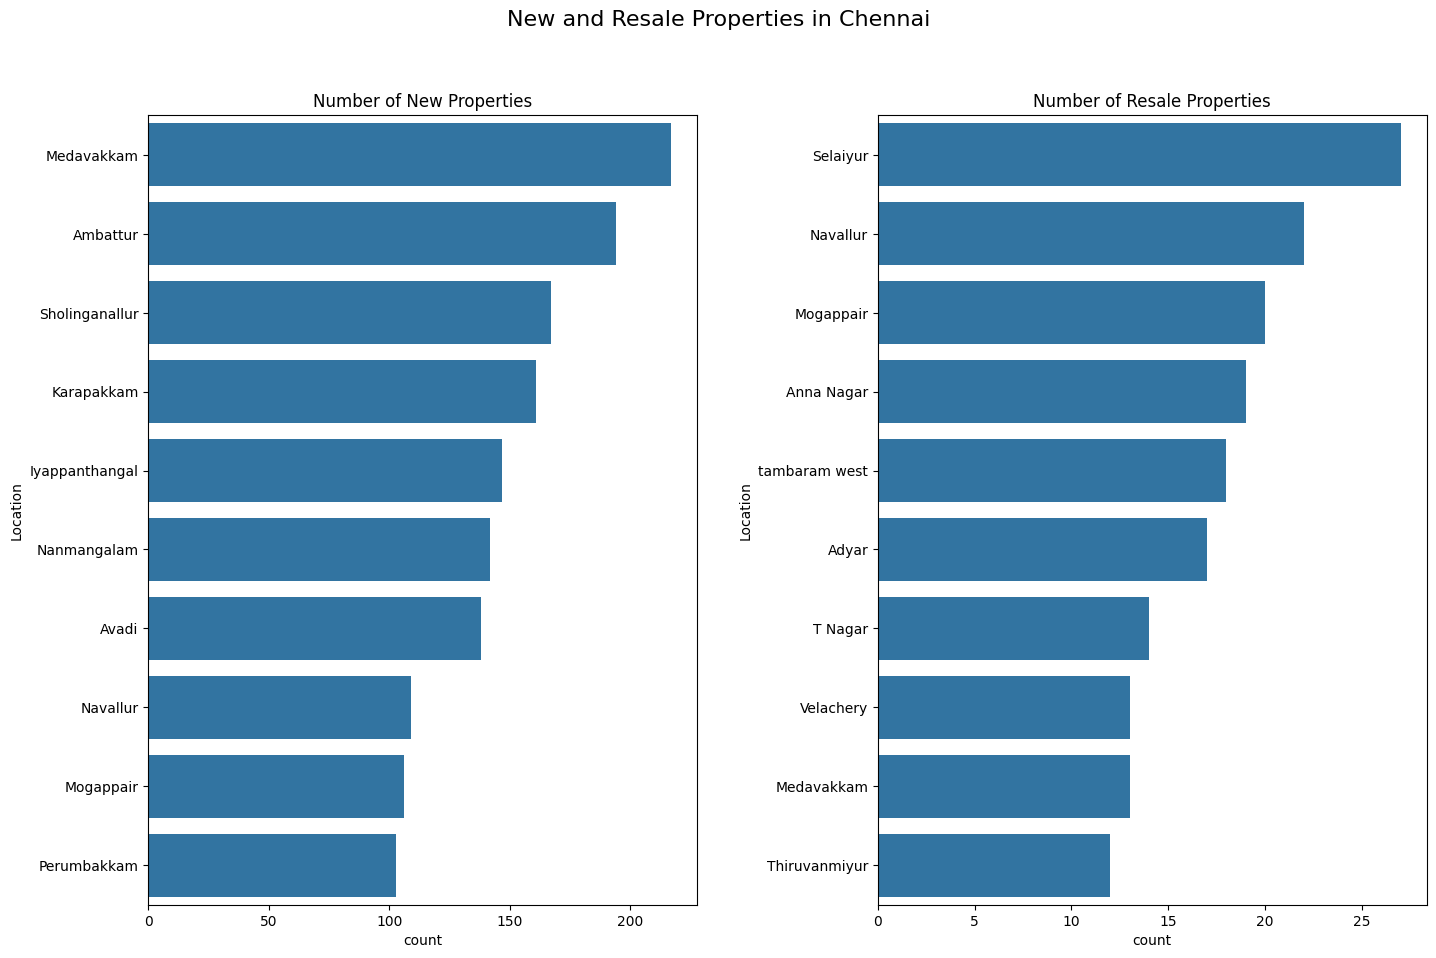

In [ ]:
def count_plot(data,title):
    df1=data[data['Resale']== 0]
    df2=data[data['Resale']== 1]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='Location', data=df1, order=df1.Location.value_counts().index[:10],ax=ax[0])
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='Location', data=df2, order=df2.Location.value_counts().index[:10],ax=ax[1])
    ax[1].set_title('Number of Resale Properties')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

count_plot(df,'New and Resale Properties in Chennai')

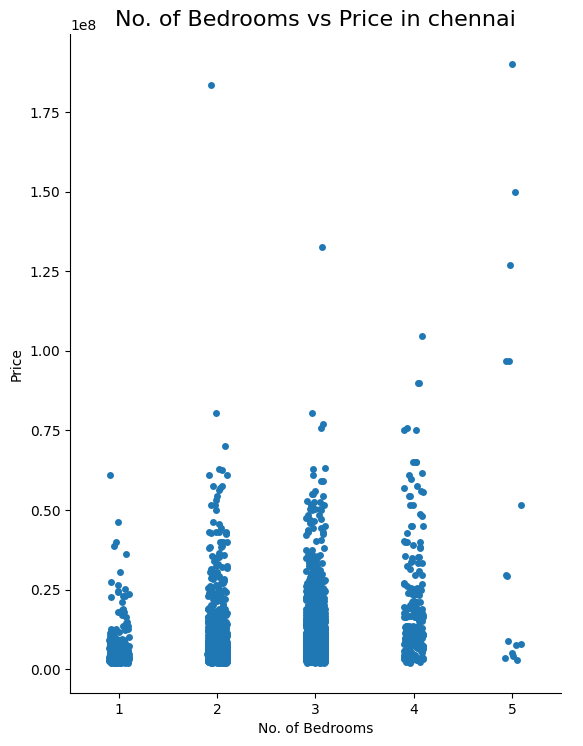

In [ ]:
def cat_plot(data,title):
    sns.catplot(x="No. of Bedrooms", y="Price", data=data)
    plt.title('No. of Bedrooms vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()
cat_plot(df,'chennai')

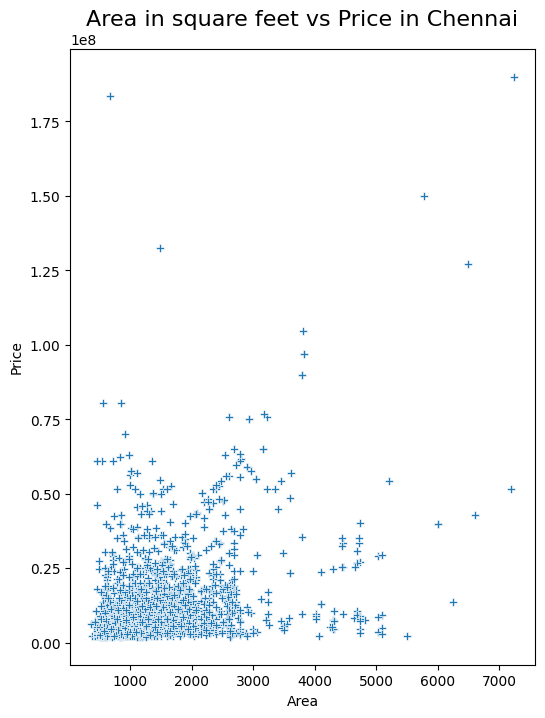

In [ ]:
def scatter_plot(data,title):
    sns.scatterplot(x="Area", y="Price", data=data , marker='P')
    plt.title('Area in square feet vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()
scatter_plot(df,'Chennai')

In [ ]:
data = df.copy()
data.replace(9,np.nan,inplace= True)
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)


<ipython-input-60-6cb4004aefc4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()
<ipython-input-60-6cb4004aefc4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), mask=mask, cmap='coolwarm',


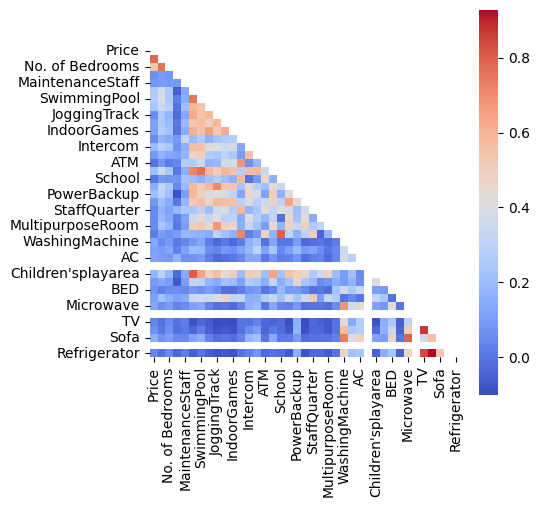

In [ ]:
plt.figure(figsize=(5,5))
corr=data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data.corr(), mask=mask, cmap='coolwarm',
            square=True)
plt.show()

In [ ]:
data = pd.get_dummies(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1768 entries, 0 to 2226
Columns: 177 entries, Price to Location_tambaram west
dtypes: float64(35), int64(4), uint8(138)
memory usage: 790.8 KB


In [ ]:
data.head(1)

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Location_Vanagaram,Location_Vandalur,Location_Velachery,Location_Velappanchavadi,Location_Vellakkal,Location_Vengaivasal,Location_Villivakkam,Location_Virugambakkam,Location_West Tambaram,Location_tambaram west
0,5500000,1310,3,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0




---


# **ML Model**


---



In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize,OneHotEncoder,LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz

In [ ]:
Seed = 10

In [ ]:
norm = 100000

In [ ]:
Y_data = data['Price']//norm
X_data = data.drop(columns=['Price'])

In [ ]:
X_data.head(3)

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,Location_Vanagaram,Location_Vandalur,Location_Velachery,Location_Velappanchavadi,Location_Vellakkal,Location_Vengaivasal,Location_Villivakkam,Location_Virugambakkam,Location_West Tambaram,Location_tambaram west
0,1310,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1126,2,0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1307,3,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_Train,X_Temp,Y_Train,Y_Temp = train_test_split(X_data,Y_data,test_size=0.2,random_state=Seed)

In [ ]:
X_Val,X_Test,Y_Val,Y_Test = train_test_split(X_Temp,Y_Temp,test_size=0.8,random_state=Seed)

In [ ]:
X_Train.shape,X_Test.shape,Y_Train.shape,Y_Test.shape

((1414, 176), (284, 176), (1414,), (284,))

In [ ]:
import keras_tuner as kt


In [ ]:
def model_builder(hp,SetWeights = False):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(176)))

  hp_units = hp.Int('units', min_value=1, max_value=500, step=2)
  hp_reg1 = hp.Choice('reg1', values=[0e0,1e-1, 1e-2, 1e-3,1e-4])
  model.add(tf.keras.layers.Dense(units=hp_units,kernel_regularizer=tf.keras.regularizers.L1L2(hp_reg1),activation='relu'))
  model.add(tf.keras.layers.Dense(units=1,activation='softplus'))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  if(SetWeights):
    model.load_weights('UpdatedModel/weights.best.keras')

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [ ]:
!rm -r Price_prediction
!rm -r UpdatedModel

rm: cannot remove 'Price_prediction': No such file or directory
rm: cannot remove 'UpdatedModel': No such file or directory


In [ ]:
objectives = [kt.Objective('val_loss','min'),
              kt.Objective('loss','min'),
              kt.Objective('root_mean_squared_error','min'),
              kt.Objective('val_root_mean_squared_error','min')]

In [ ]:
tuner = kt.Hyperband(model_builder,objectives,max_epochs=25,factor=3,
                     project_name='Price_prediction')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience=5)
get_best = tf.keras.callbacks.ModelCheckpoint(filepath='UpdatedModel/weights.best.keras',
                                              monitor='val_loss',save_best_only=True)

In [ ]:
tuner.search(X_Train,Y_Train, epochs=100, validation_split=0.1, callbacks=[stop_early])

Trial 30 Complete [00h 00m 04s]
multi_objective: 10894.859645843506

Best multi_objective So Far: 8820.216659545898
Total elapsed time: 00h 01m 34s


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.values)

{'units': 47, 'reg1': 0.0, 'learning_rate': 0.01, 'tuner/epochs': 25, 'tuner/initial_epoch': 9, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}


In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_Train, Y_Train, epochs=100, validation_split=0.1,callbacks=[stop_early,get_best])

Epoch 1/100
40/40 [==============================] - 1s 9ms/step - loss: 10410.4619 - root_mean_squared_error: 102.0317 - val_loss: 1992.4921 - val_root_mean_squared_error: 44.6373
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 8696.6514 - root_mean_squared_error: 93.2558 - val_loss: 5010.9902 - val_root_mean_squared_error: 70.7883
Epoch 3/100
40/40 [==============================] - 0s 8ms/step - loss: 7998.0684 - root_mean_squared_error: 89.4319 - val_loss: 1961.1160 - val_root_mean_squared_error: 44.2845
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 7482.7012 - root_mean_squared_error: 86.5026 - val_loss: 2581.4253 - val_root_mean_squared_error: 50.8077
Epoch 5/100
40/40 [==============================] - 0s 6ms/step - loss: 7342.3608 - root_mean_squared_error: 85.6876 - val_loss: 3040.2061 - val_root_mean_squared_error: 55.1381
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 7288.9097 - root_mean_squared_

In [ ]:
model=model_builder(best_hps,SetWeights = True)

In [ ]:
model.evaluate(X_Val,Y_Val)

3/3 [==============================] - 0s 8ms/step - loss: 2521.5959 - root_mean_squared_error: 50.2155


[2521.595947265625, 50.21549606323242]

In [ ]:
'''best hps =
1 : {'units': 226, 'reg1': 0.001, 'Layer2': False, 'Layer3': False, 'tuner/epochs': 25, 'tuner/initial_epoch': 9, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0014', 'learning_rate': 0.0001}
2 : {'units': 256, 'reg1': 0.0, 'Layer2': False, 'Layer3': False, 'tuner/epochs': 25, 'tuner/initial_epoch': 9, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0019', 'learning_rate': 0.001}
3:  {'units': 63, 'reg1': 0.001, 'learning_rate': 0.01, 'tuner/epochs': 25, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
'''

"best hps =\n1 : {'units': 226, 'reg1': 0.001, 'Layer2': False, 'Layer3': False, 'tuner/epochs': 25, 'tuner/initial_epoch': 9, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0014', 'learning_rate': 0.0001}\n2 : {'units': 256, 'reg1': 0.0, 'Layer2': False, 'Layer3': False, 'tuner/epochs': 25, 'tuner/initial_epoch': 9, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0019', 'learning_rate': 0.001}\n3:  {'units': 63, 'reg1': 0.001, 'learning_rate': 0.01, 'tuner/epochs': 25, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}\n"

In [ ]:
best_hps = {'units': 63, 'reg1': 0.001, 'learning_rate': 0.01, 'tuner/epochs': 25, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
best_weights = "weights.best (1).keras"

In [ ]:
def best_model_builder():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(176)))

  model.add(tf.keras.layers.Dense(units=63,kernel_regularizer=tf.keras.regularizers.L1L2(0.001),activation='relu'))
  model.add(tf.keras.layers.Dense(units=1,activation='softplus'))
  model.load_weights(best_weights)

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [ ]:
model = best_model_builder()

9/9 [==============================] - 0s 2ms/step


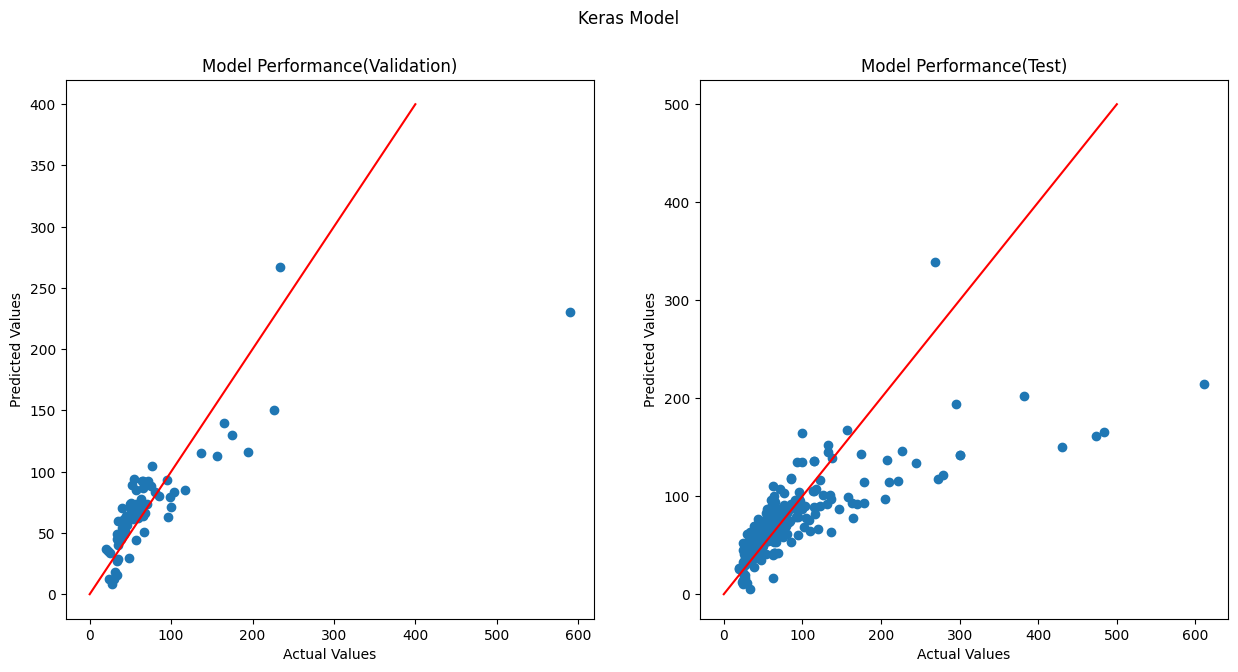

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

fig.suptitle("Keras Model")
ax[0].scatter(Y_Val,model.predict(X_Val))
ax[0].plot([0,400],[0,400],'r-')
ax[0].set(xlabel='Actual Values')
ax[0].set(ylabel='Predicted Values')
ax[0].set_title("Model Performance(Validation)")

ax[1].scatter(Y_Test,model.predict(X_Test))
ax[1].plot([0,500],[0,500],'r-')
ax[1].set(xlabel='Actual Values')
ax[1].set(ylabel='Predicted Values')
ax[1].set_title("Model Performance(Test)")
plt.show()

In [ ]:
model2 = DecisionTreeRegressor(random_state=0, max_depth=6, min_samples_split=5).fit(X_Train, Y_Train)


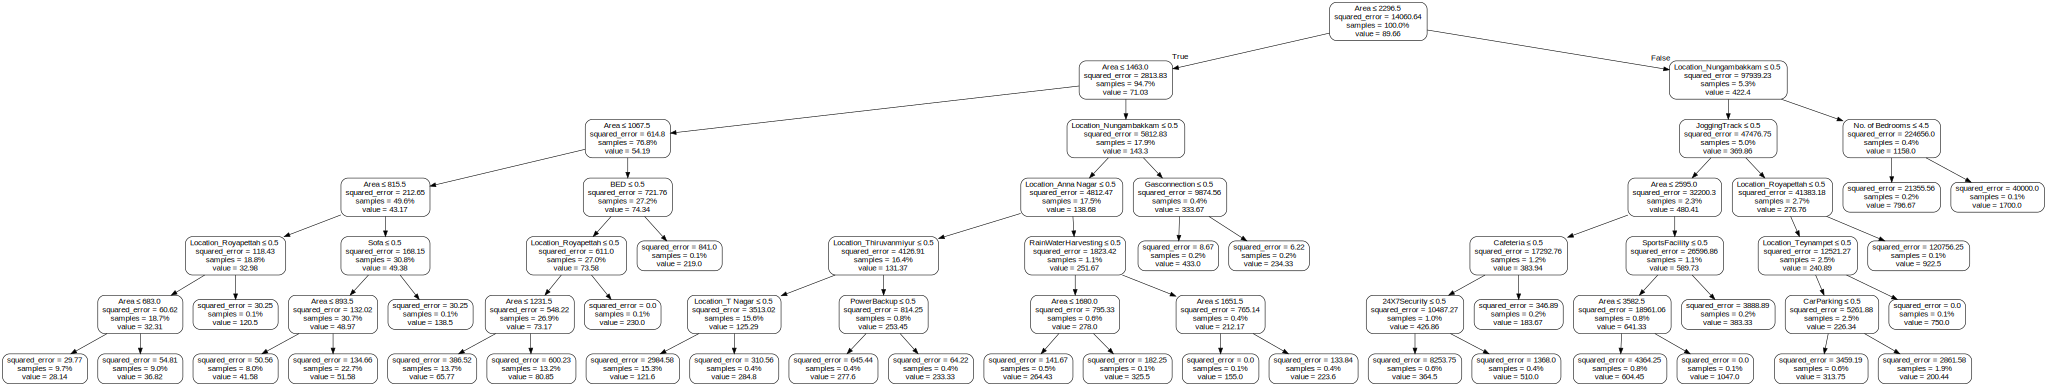

In [ ]:
tree_graph = tree.export_graphviz(model2, out_file=None, feature_names=X_Train.columns,
                                  max_depth=6, rounded=True, special_characters=True,
                                  proportion=True, precision=2, class_names=True)
graph=graphviz.Source(tree_graph)
graph.render('decision_tree', view=True, cleanup=True, format='png')
graph

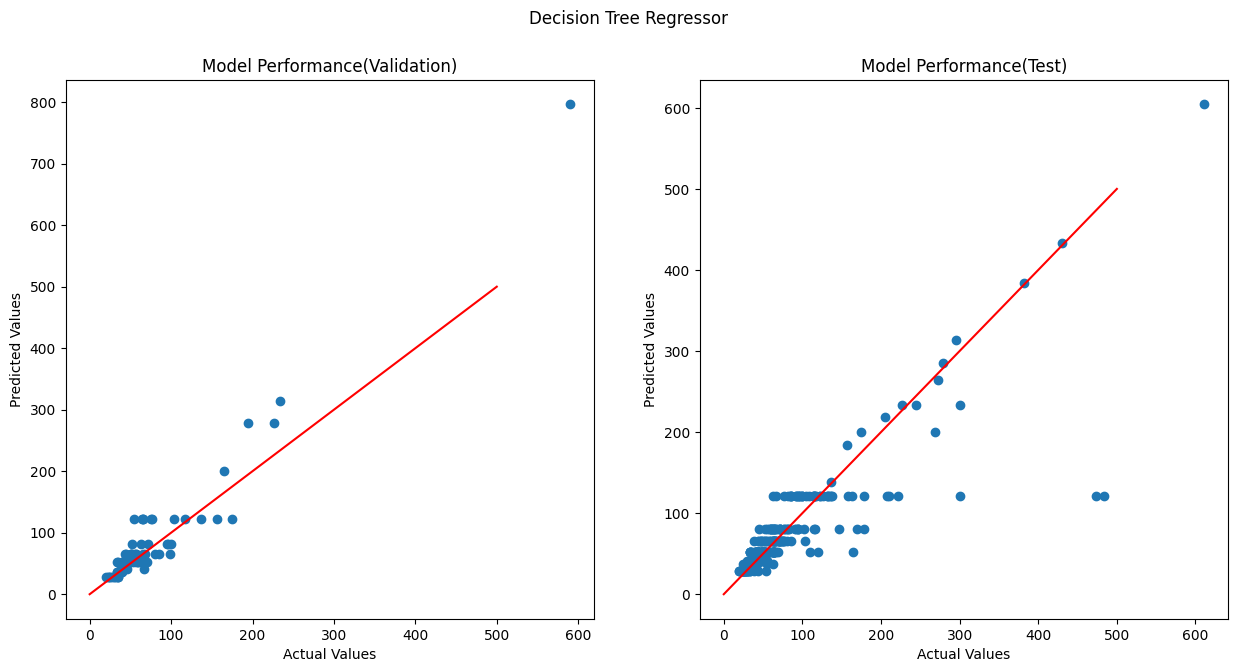

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

fig.suptitle('Decision Tree Regressor')
ax[0].scatter(Y_Val,model2.predict(X_Val))
ax[0].plot([0,500],[0,500],'r-')
ax[0].set(xlabel='Actual Values')
ax[0].set(ylabel='Predicted Values')
ax[0].set_title("Model Performance(Validation)")

ax[1].scatter(Y_Test,model2.predict(X_Test))
ax[1].plot([0,500],[0,500],'r-')
ax[1].set(xlabel='Actual Values')
ax[1].set(ylabel='Predicted Values')
ax[1].set_title("Model Performance(Test)")
plt.show()